In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D   
from matplotlib.patches import Circle, Wedge
from matplotlib.collections import PatchCollection

## 概述

### 1.matplotlib的三层api
matplotlib的原理或者说基础逻辑是，使用artist对象在画布canvas上绘制render图形<br>
matplotlib.backend_bases.FigureCanvas 绘图区<br>
matplotlib.backend_bases.Renderer 渲染器，可以理解为如何在canvas上画图<br>
matploylib.artist.Artist 具体的图表组件

## 详解matplotlib.artist.Artist
artist有两种类型primitives和containers<br>
primitive是基本要素，包含一些标准图形对象，即每种图形属于那种对象<br>
container是容器，用来装基本要素，包括图形figure，坐标系axes和坐标轴axis

### 基本要素primitives
- 重点介绍primitives的几种类型：曲线-line2D，矩形-Rectangle，多边形-polygon，图像image

#### Line-2D
- Line2D的属性
    - xdata:x轴数据集，若忽略，则默认range(1,len(ydata)+1)
    - ydata:y轴数据集
    - linewidth:线宽
    - linestyle:线型
    - color:颜色
    - marker:点的形状
    - markersize:点的大小
    - markeredgecolor:点的边框颜色
    - markeredgewidth:点的边框宽度

##### 设置Line2D的属性的三种方法
- 直接在plot()函数中设置
- 通过获取线对象，在线对象中设置
- 获得线属性，使用setp()函数设置

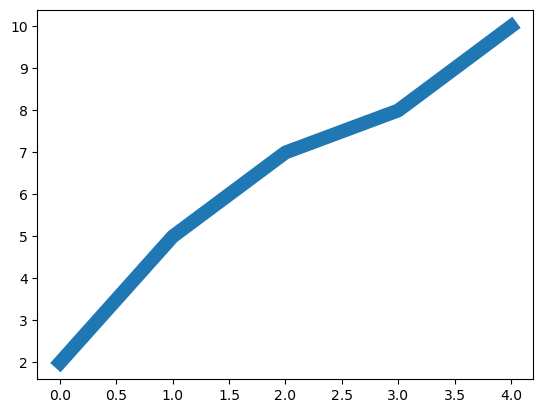

In [2]:
# 1-直接在plot()函数中设置
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x,y,linewidth=10); #设置线的粗细为10

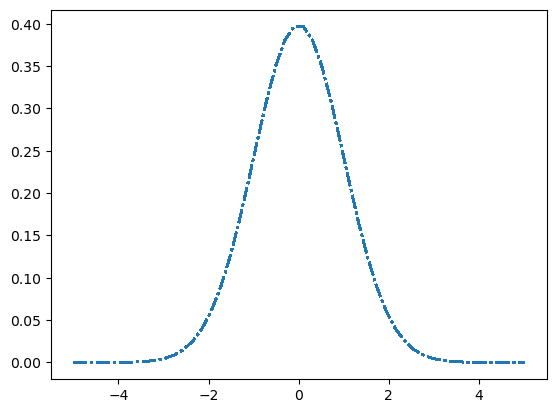

In [3]:
# 2-通过获得线对象，对线对象进行设置
from scipy.stats import norm
x = np.linspace(-5,5,50)
y = norm.pdf(x,0,1)
line, = plt.plot(x,y,'--') 
line.set_linestyle('-.')
'''
在 Matplotlib 中，plt.plot() 函数用于绘制二维图形，
并返回一个包含 Line2D 对象的列表。Line2D 对象是 Matplotlib 中的一个 
artist，它代表绘制的线条。Line2D 对象包含了与线条相关的各种属性和方法。
'''
line.set_antialiased(False) # 关闭抗锯齿功能


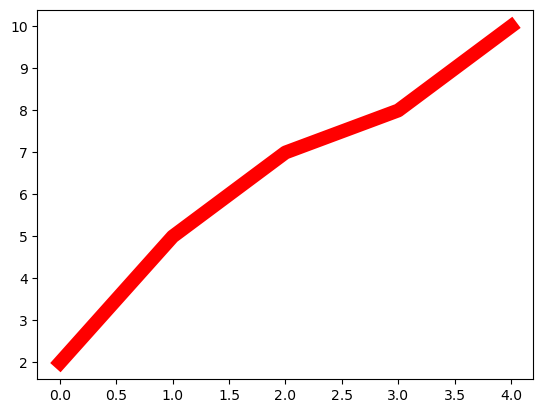

In [ ]:
# 获得线属性，使用setp()函数设置
x = range(0,5)
y = [2,5,7,8,10]
lines = plt.plot(x,y)
plt.setp(lines,color='r',linewidth=10);
# 批量设置线对象的属性，理解成全局设置

##### 绘制直线line
- 1 plt.plot()方法绘制
- 2 Line2D方法绘制


<Axes.ArtistList of 2 lines>


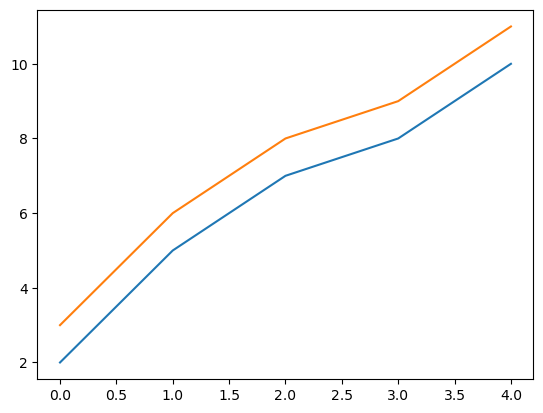

In [5]:
# 1-绘制直线line
x = range(0,5)
y1 = [2,5,7,8,10]
y2 = [3,6,8,9,11]
fig,ax = plt.subplots()
ax.plot(x,y1)
ax.plot(x,y2)
print(ax.lines);# 通过直接使用辅助方法画线，
 # 打印ax.lines后可以看到在matplotlib在底层创建了两个Line2D对象

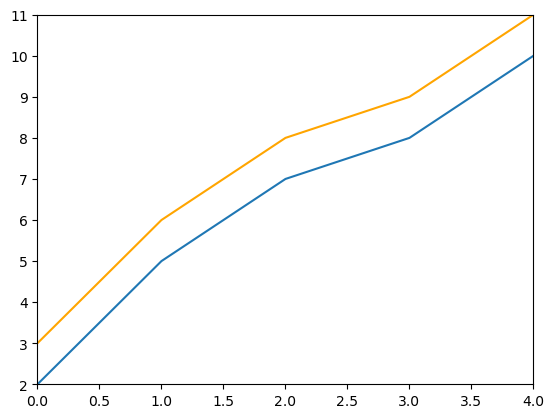

In [6]:
# 2-Line2D对象绘制
x = range(0,5)
y1 = [2,5,7,8,10]
y2 = [3,6,8,9,11]
fig,ax = plt.subplots()
lines = [Line2D(x,y1),Line2D(x,y2,color='orange')]#显示创建Line2D对象
for line in lines:
    ax.add_line(line) #使用add_line方法将创建的Line2D添加到子图中
ax.set_xlim(0,4)
ax.set_ylim(2,11);

##### 绘制误差折线图errorbar
- errorbar中的主要参数
    - x：需要绘制的line中点的在x轴上的取值
    - y：需要绘制的line中点的在y轴上的取值
    - yerr：指定y轴水平的误差
    - xerr：指定x轴水平的误差
    - fmt：指定折线图中某个点的颜色，形状，线条风格，例如‘co--’
    - ecolor：指定error bar的颜色
    - elinewidth：指定error bar的线条宽度

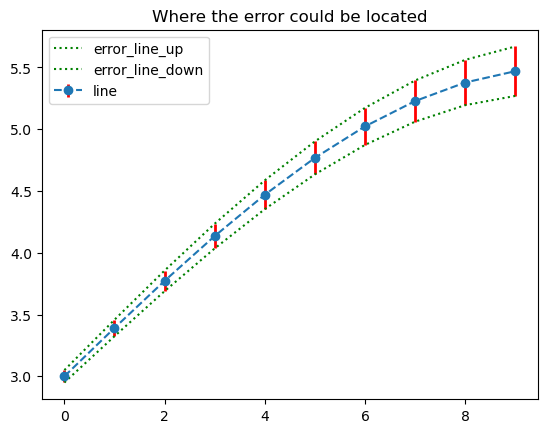

In [15]:
fig = plt.figure()
x = np.arange(10)
y = 2.5*np.sin(x/20*np.pi)
yerr = np.linspace(0.05,0.2,10)
plt.errorbar(x,y+3,yerr=yerr,fmt='o--',ecolor='r',elinewidth=2,label='line')
plt.plot(x,y+3+yerr,color='g',linestyle=':',label='error_line_up')
plt.plot(x,y+3-yerr,color='g',linestyle=':',label='error_line_down')
plt.title('Where the error could be located')
plt.legend()
plt.show()

#### patches二维图形类
- matplotlib.patches.Patch
- 矩形、多边形、楔形

##### Rectangle矩形
- 通过锚点xy及其宽度和高度生成。 Rectangle本身的主要比较简单，即xy控制锚点，width和height分别控制宽和高
- class matplotlib.patches.Rectangle(xy, width, height, angle=0.0, **kwargs)
- hist直方图、bar条形图

###### hist直方图
- x: 数据集，最终的直方图将对数据集进行统计
- bins: 统计的区间分布
- range: tuple, 显示的区间，range在没有给出bins时生效
- density: bool，默认为false，显示的是频数统计结果，为True则显示频率统计结果，这里需要注意，频率统计结果=区间数目/(总数*区间宽度)，和normed效果一致，官方推荐使用density
- histtype: 可选{'bar', 'barstacked', 'step', 'stepfilled'}之一，默认为bar，推荐使用默认配置，step使用的是梯状，stepfilled则会对梯状内部进行填充，效果与bar类似
- align: 可选{'left', 'mid', 'right'}之一，默认为'mid'，控制柱状图的水平分布，left或者right，会有部分空白区域，推荐使用默认
- log: bool，默认False,即y坐标轴是否选择指数刻度
- stacked: bool，默认为False，是否为堆积状图

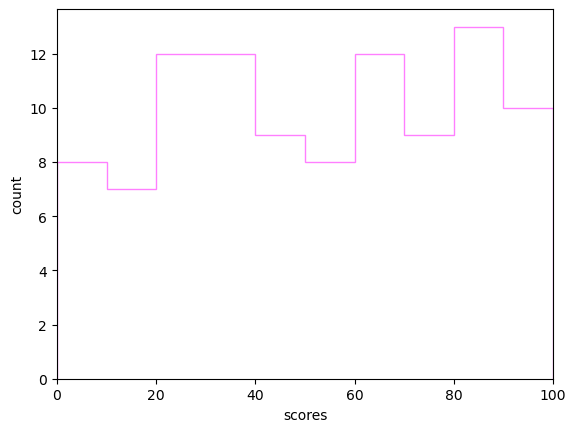

In [113]:
# 绘制hist直方图
x = np.random.randint(0,100,100)#生成[0-100)之间的100个数据,即 数据集
bins = np.arange(0,101,10)  #设置连续的边界值，即直方图的分布区间[0,10),[10,20)... 
plt.hist(x,bins,color='fuchsia',alpha=0.5,histtype='step')
plt.xlabel('scores')
plt.ylabel('count')
plt.xlim(0,100);


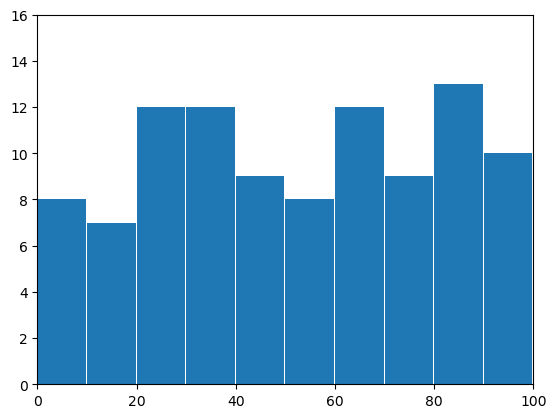

In [114]:
# Rectangle矩形类绘制直方图--相对来说很麻烦的方法
df = pd.DataFrame(columns=['data'])
df.data = x
df['fenzu'] = pd.cut(df.data,bins = np.arange(0,101,10),right=False,include_lowest=True)
df_cnt = df.value_counts(subset='fenzu').reset_index()
df_cnt['fenzu'].astype(str).str.extract(r'\[(.*?)\,(.*?)\)')
df_cnt[['mini','maxi']] = df_cnt['fenzu'].astype(str).str.extract(r'\[(.*?)\,(.*?)\)').apply(lambda x:x.astype(int))
# pd.concat([df_cnt,df_cnt['fenzu'].astype(str).str.extract(r'\[(.*?)\,(.*?)\)').rename(columns={0:'mini',1:'maxi'})],axis=1)
df_cnt['width'] = df_cnt['maxi']-df_cnt['mini']
df_cnt.sort_values(by='mini',inplace=True)
df_cnt.reset_index(inplace=True,drop=True)
# df_cnt
# 准备完数据，绘制图形
fig = plt.figure()
ax1 = fig.add_subplot(111)
for i in df_cnt.index:
    rect = plt.Rectangle((df_cnt.loc[i,'mini'],0),df_cnt.loc[i,'width']-0.2,df_cnt.loc[i,'count'])
    ax1.add_patch(rect)

ax1.set_xlim(0,100)
ax1.set_ylim(0,16);

###### bar-柱状图
- left：x轴的位置序列，一般采用range函数产生一个序列，但是有时候可以是字符串
- height：y轴的数值序列，也就是柱形图的高度，一般就是我们需要展示的数据；
- alpha：透明度，值越小越透明
- width：为柱形图的宽度，一般这是为0.8即可；
- color或facecolor：柱形图填充的颜色；
- edgecolor：图形边缘颜色
- label：解释每个图像代表的含义，这个参数是为legend()函数做铺垫的，表示该次bar的标签

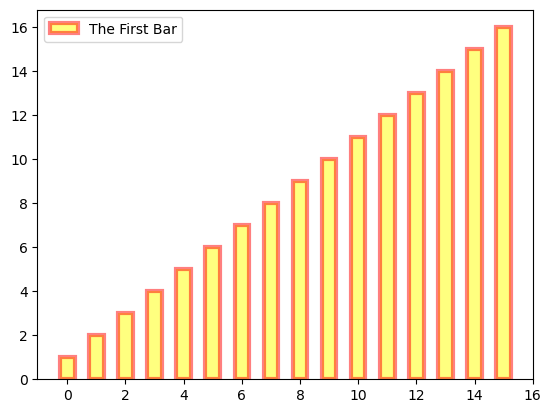

In [118]:
# 使用bar接口绘制柱状图
y = range(1,17)
plt.bar(np.arange(16),y,alpha=0.5,width=0.5,
        color='yellow',edgecolor='red',label='The First Bar',lw=3)
plt.legend();

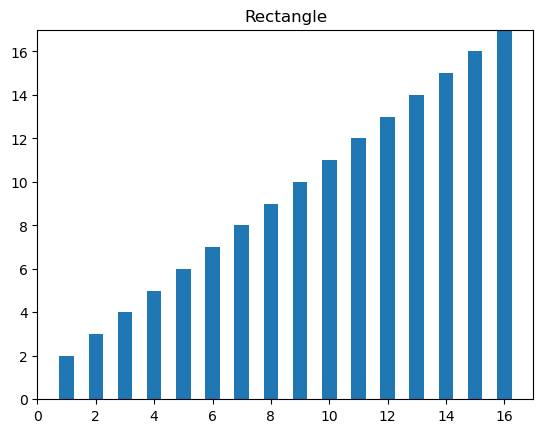

In [126]:
#  Rectangle矩形类绘制柱状图
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(1,17):
    rect = plt.Rectangle(xy=(i-0.25,0),width=0.5,height=i+1)
    ax1.add_patch(rect)

ax1.set_xlim(0,17)
ax1.set_ylim(0,17)
ax1.set_title('Rectangle');

##### Polygon-多边形
- class matplotlib.patches.Polygon(xy, closed=True, **kwargs)
- xy: 多边形的顶点
- closed 为True则指定多边形将起点和终点重合从而显式关闭多边形
- 常用fill
    - matplotlib.pyplot.fill(*args, data=None, **kwargs)
    - 绘制填充多边形
    - 关于x、y和color的序列，其中color是可选的参数，每个多边形都是由其节点的x和y位置列表定义的，后面可以选择一个颜色说明符。您可以通过提供多个x、y、[颜色]组来绘制多个多边形。

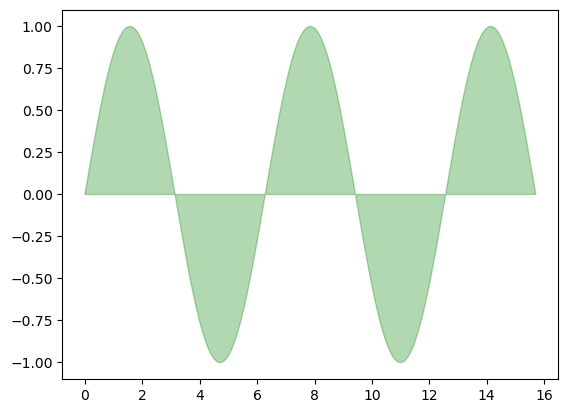

In [133]:
# 使用fill接口来绘制多边形
x = np.linspace(0,5*np.pi,1000,)
y1 = np.sin(x)
plt.fill(x,y1,color = "g",alpha = 0.3)
plt.show()

##### Wedge-楔形
- matplotlib.patches.Wedge类是楔型类。其基类也是matplotlib.patches.Patch。
- class matplotlib.patches.Wedge(center, r, theta1, theta2, width=None, **kwargs)
- 以坐标x,y为中心，半径为r，从θ1扫到θ2(单位是度)。如果宽度给定，则从内半径r -宽度到外半径r画出部分楔形。wedge中比较常见的是绘制饼状图。
- matplotlib.pyplot.pie(x, explode=None, labels=None,colors=None,startangle=0)
    - x：楔型的形状，一维数组。
    - explode：如果不是等于None，则是一个len(x)数组，它指定用于偏移每个楔形块的半径的分数。
    - labels：用于指定每个楔型块的标记，取值是列表或为None。
    - colors：饼图循环使用的颜色序列。如果取值为None，将使用当前活动循环中的颜色。
    - startangle：饼状图开始的绘制的角度。
    - 制作数据x的饼图，每个楔子的面积用x/sum(x)表示。